## Multi Layer Perceptron

This is the MLP class used to feedforward and backpropagate the network across a defined number 
of iterations and produce predictions. After iteration the predictions are assessed using 
Binary Cross Entropy Cost function.  


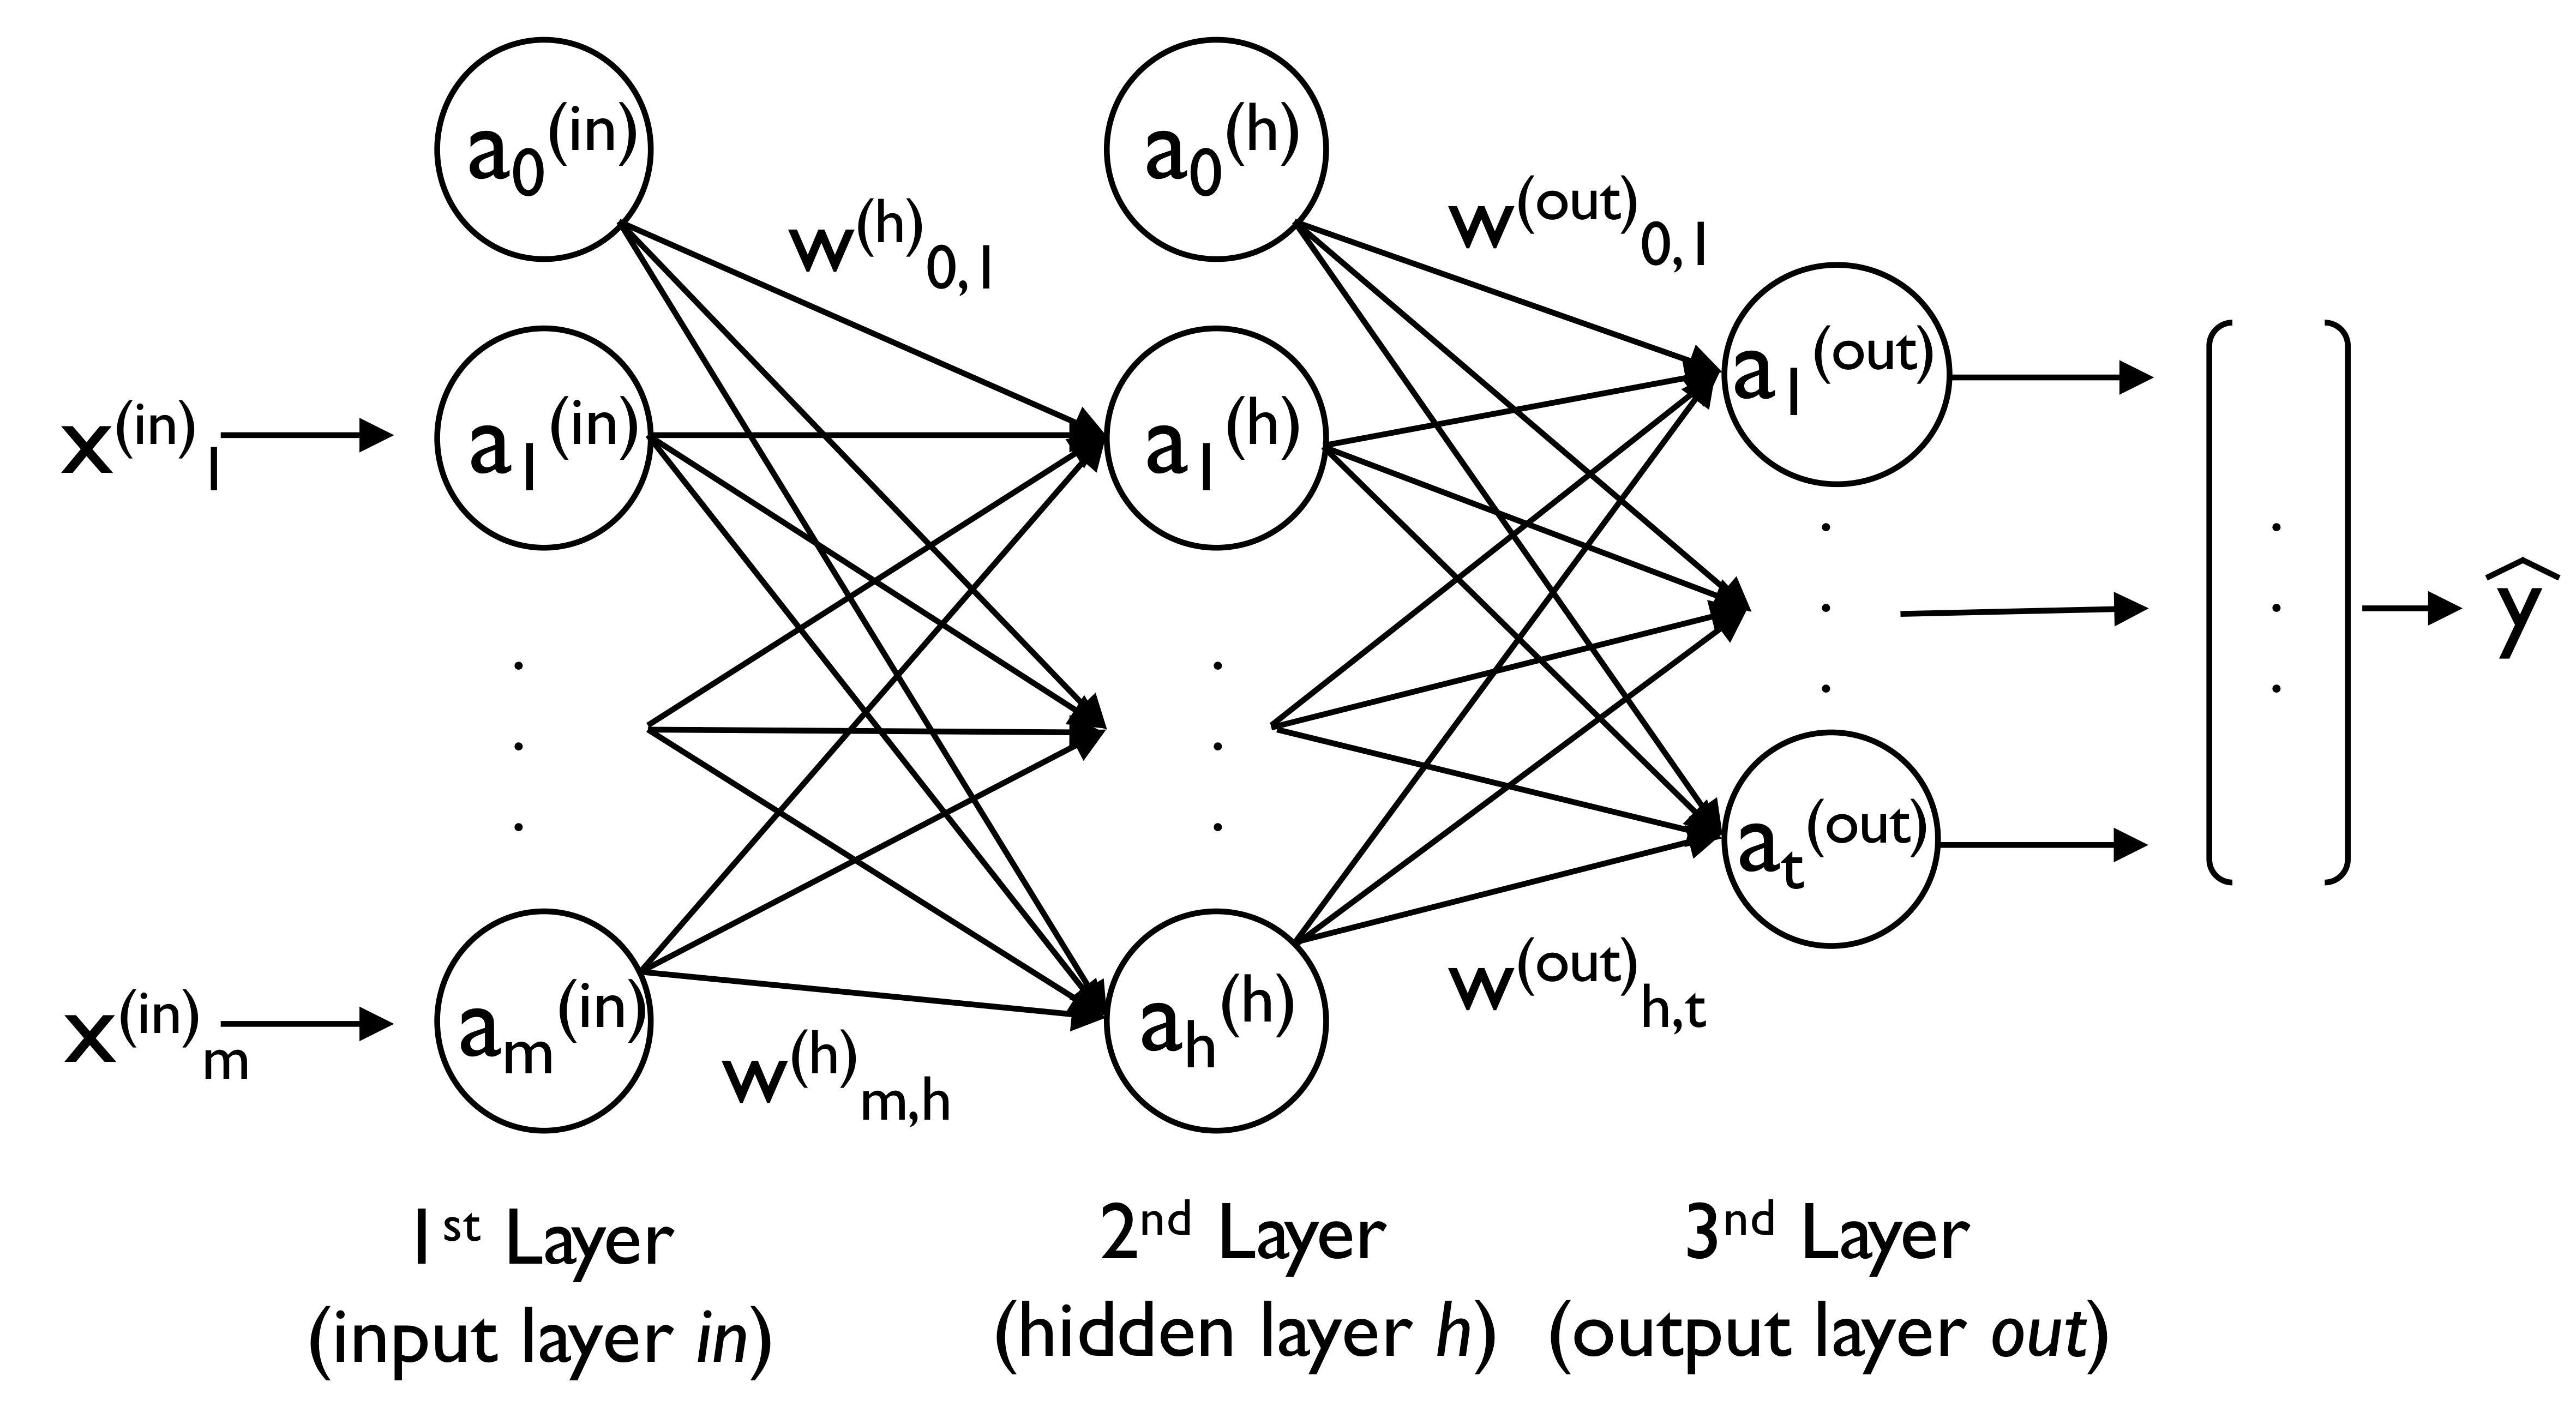

In [7]:
from IPython.display import Image
%matplotlib inline
Image(filename='12_02.png',width=900)


In [9]:
#import required libaries
import numpy as np

class MLP():
    
    def __init__(self, design_matrix, Y, iterations=100000, lr=1e-1, input_layer = 2, hidden_layer = 3,output_layer =1):
        self.design_matrix = design_matrix #design matrix attibute
        self.iterations = iterations #iterations attibute
        self.lr = lr #learning rate attibute
        self.input_layer = input_layer #input layer attibute 
        self.hidden_layer = hidden_layer #hidden layer attibute
        self.output_layer = output_layer #output layer attibute
        self.weight_matrix_1 = np.random.randn(self.input_layer, self.hidden_layer) #weight attribute connecting to the hidden layer
        self.weight_matrix_2 = np.random.randn(self.hidden_layer, self.output_layer)#weight attribute connecting to the output layer
        self.cost = [] #cost list attribute 
        self.p_hats = [] #predictions list attribute

    def sigmoid(self, x): # sigmoid function used at the hidden layer and output layer
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x): # sigmoid derivative used for backpropgation 
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def forward_propagation(self):#define function to feedforward the network 
        z = np.dot(self.design_matrix, self.weight_matrix_1) #linear transformation to the hidden layer
        activation_func = self.sigmoid(z)#hidden layer activation function
        zh = np.dot(activation_func, self.weight_matrix_2)#linear transformation to the output layer
        p_hat = self.sigmoid(zh)#output layer prediction
        return z, activation_func, zh, p_hat

    def BCECost(self, y, p_hat): # binary cross entropy cost function
        bce_cost = -(np.sum(y * np.log(p_hat) + (1 - y) * np.log(1 - p_hat))) / len(y)
        return bce_cost

    def backword_prop(self, z_1, activation_func, z_2, p_hat): #backpropagation
        del_2_1 = p_hat - Y
        partial_deriv_2 = np.dot(activation_func.T, del_2_1) #∂loss/∂p *∂p/∂zh * ∂zh/∂wh
        del_1_1 = del_2_1 
        del_1_2 = np.multiply(del_1_1, self.weight_matrix_2.T) 
        del_1_3 = np.multiply(del_1_2, self.sigmoid_derivative(z_1))
        partial_deriv_1 = np.dot(self.design_matrix.T, del_1_3) #∂loss/∂p * ∂p/∂zh * ∂zh/∂h * ∂h/∂z * ∂z/∂w
        return partial_deriv_2, partial_deriv_1

    def train(self):#train the network
        for i in range(self.iterations): #loop based on number of iterations
            z_1, activation_func, z_2, p_hat = self.forward_propagation()# feedforward
            partial_deriv_2, partial_deriv_1 = self.backword_prop(z_1, activation_func, z_2, p_hat)#backpropgate
            self.weight_matrix_1 = self.weight_matrix_1 - self.lr * partial_deriv_1#update weights connecting to the hidden layer (gradient descent)
            self.weight_matrix_2 = self.weight_matrix_2 - self.lr * partial_deriv_2#update weights connecting to the output layer (gradient descent )
            self.cost.append(self.BCECost(Y, p_hat))#store BCE cost in list
            self.p_hats.append(p_hat)#store predictions in list
        


In [11]:
# Prepare the XOR Logic Gate data: create an array for each training example x feature, and an array for each corrosponding y label.
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]]) #input features (4 x 2 design matrix)
Y = np.array([[1], [1], [0], [0]])#ground truth y labels (4x1)

mlp = MLP(X,Y)#Pass data to the model (design matrix and y label)
mlp.train() #Train the model

#Print predictions, number of iterations and the ground truth labels.
print(f'\n The MLP predictions for each training example, based on {mlp.iterations} iterations are:\n\n{np.round(mlp.p_hats[-1],2)}')
print('\n--------------------------------------------------------------------------------------------------')
print(f'\n The ground truth Y labels are are:\n\n{Y}')


 The MLP predictions for each training example, based on 100000 iterations are:

[[1.]
 [1.]
 [0.]
 [0.]]

--------------------------------------------------------------------------------------------------

 The ground truth Y labels are are:

[[1]
 [1]
 [0]
 [0]]
